# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Objective
Develop a machine learning model that can accurately predict the selling price of used cars based on various features. Our model should take into account all of the given attributes (year, manufacturer, model, fuel type, ect.)

### Success Criteria
For a given row in the input dataset, our model will be able to analyze the attributes given and predict the price of the car with an accepable accuracy.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("data/vehicles.csv")
print (df.shape)
df.describe()

(426880, 18)


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


From our shape function we can see that there are 426880 rows, and 18 columns. From our describe we can see that 4 of these collums are numberical and can infer that the rest are categorical.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

First thing to do is find all of the missing values and drop them as they will only interfere with our predictions and analysis.

In [5]:
null_vals = df.isnull().sum()
print(null_vals)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


To start we should look for columns that wont be of use to us. Examples of this would be the ID and VIN number columns as that information has no bearing on the price of the car.

In [6]:
df_clean = df.drop('id', axis=1)
df_clean = df_clean.drop('region', axis=1)
df_clean = df_clean.drop('model', axis=1)
df_clean = df_clean.drop('cylinders', axis=1)
df_clean = df_clean.drop('VIN', axis=1)
df_clean = df_clean.drop('drive', axis=1)
df_clean = df_clean.drop('size', axis=1)
df_clean = df_clean.drop('paint_color', axis=1)
df_clean = df_clean.drop('state', axis=1)

From here we should drop NULL values in columns that we are keeping and dont have enough data to accurately replace.

In [7]:
df_clean.dropna(subset=['condition','type'], inplace=True)

From here lets figure out what to do with the columns we have left, starting with the manufacturer.

In [8]:
df_clean['manufacturer'].value_counts()

manufacturer
ford               31865
chevrolet          27686
toyota             17958
honda              11193
nissan              9610
jeep                8956
bmw                 8474
gmc                 8331
ram                 7266
dodge               6576
mercedes-benz       6035
volkswagen          5591
hyundai             5373
audi                4938
lexus               4845
subaru              4773
kia                 4356
acura               4291
cadillac            4091
infiniti            3377
buick               3300
mazda               3237
chrysler            3173
lincoln             2827
volvo               2246
mitsubishi          2118
jaguar              1485
mini                1424
pontiac             1177
rover               1069
alfa-romeo           745
mercury              704
tesla                635
porsche              632
saturn               577
fiat                 513
harley-davidson       50
ferrari               35
datsun                29
aston-martin

This column contains a lot of different categories within it, however, the data that these categories hold is far too valuable to just remove. For our analysis we will simply use these categories.

In [9]:
df_clean['condition'].describe()

count     220001
unique         6
top         good
freq      111383
Name: condition, dtype: object

These values are likely to have a positive correlation with price, as the better the quality of the car the more likely it will sell for a high price. The problem here though, is the significant amount of missing data. Because this data is so important however we will run multiple imputation on it in order to fill in the missing values.

In [10]:
df_clean['fuel'].describe()

count     220001
unique         5
top          gas
freq      183954
Name: fuel, dtype: object

This is also likely to have a high correlation with price. Along with that since theres so few missing values, we can run imputation on it to fill in the values without worry of introducing errors.

In [11]:
df_clean['title_status'].describe()

count     214520
unique         6
top        clean
freq      206849
Name: title_status, dtype: object

Title status is likely to have a high correlation with price. It also has very few missing values, so just like fuel we will run imputation on this column with little worry of introducing errors.

In [12]:
df_clean['transmission'].describe()

count        219984
unique            3
top       automatic
freq         149091
Name: transmission, dtype: object

Transmission type is likely to have a high correlation with price. It also has very few missing values, so just like fuel we will run imputation on this column with little worry of introducing errors.


In [13]:
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

Vehicle type is likely to have a high correlation with price, however it has a large number of NULL values. As such we will have to run multiple imputation on it to full in these values.


In [14]:
df_clean['year'].describe()

count    220001.000000
mean       2011.251272
std           9.503441
min        1900.000000
25%        2008.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

Since all of these are valid values we will simply keep the data again and change this to the age of the car. We want to change this to the age to make it easier to understand. We expect to see a negative correlation between age and price.

In [15]:
df_clean['age'] = (2024 - df_clean['year']).astype(int)
df_clean.drop(columns=['year'], inplace=True)

Now lets look at our milage for these cars.

In [16]:
df_clean['odometer'].describe()

count    2.183310e+05
mean     9.291309e+04
std      2.043288e+05
min      0.000000e+00
25%      3.136350e+04
50%      7.845800e+04
75%      1.302410e+05
max      1.000000e+07
Name: odometer, dtype: float64

What we see here are some highly unlikely values such as 0 and 10 million. These are likely to be falsely reported values and as such will need to be cut down significanly for us to get more legitimate data. To do so, lets look at a graph of the distribution of our odometer values.

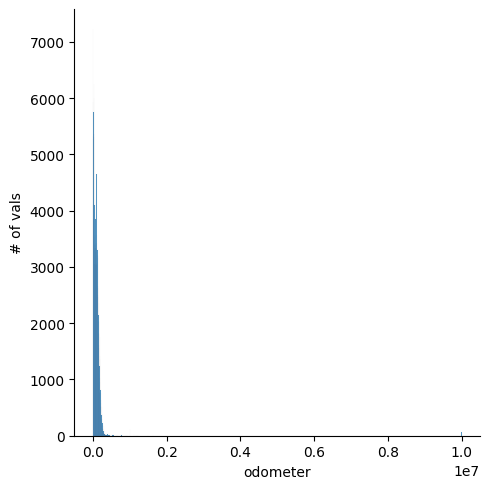

In [17]:
sns.displot(df_clean['odometer']).set(xlabel='odometer', ylabel='# of vals')

Our data seems to be significantly skewed right. This means we have a lot of outliers far above the average value. To fix this lets remove all values above 500,000 miles.

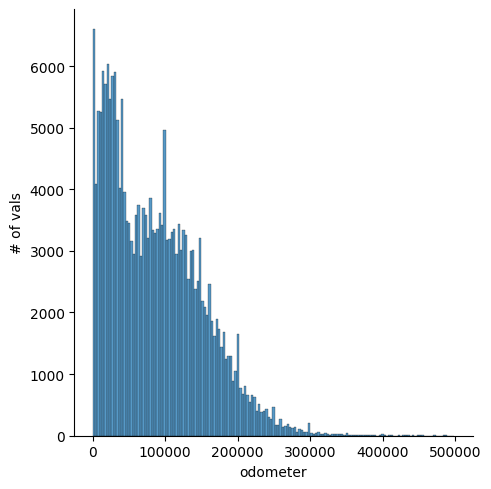

In [18]:
df_odo_test = df_clean[df_clean.odometer.ne(0) & df_clean.odometer.lt(500000)]
sns.displot(df_odo_test['odometer']).set(xlabel='odometer', ylabel='# of vals')

As we can see we have a lot less numbers in the extremely high range, and our distribution looks a bit better. As such, we will be culling our odometer values to this number.

In [19]:
df_clean = df_odo_test
df_clean['odometer'].describe()

count    217138.000000
mean      87315.867950
std       64581.260993
min           1.000000
25%       31547.000000
50%       78475.000000
75%      130000.000000
max      499232.000000
Name: odometer, dtype: float64

Now lets look at our target variable, price. Here we want to look for outliers again and cull them.

In [20]:
df_clean['price'].describe()

count    2.171380e+05
mean     4.323541e+04
std      8.384333e+06
min      0.000000e+00
25%      6.910000e+03
50%      1.559000e+04
75%      2.759000e+04
max      3.736929e+09
Name: price, dtype: float64

Here we see a value of 3 billion???? Now while that mustve be a really cool car that sold for \$3 billion, its highly unlikely that this is real data. On the other hand we see a value of \$0. An while I would take a free car any day, its more likely that this is also falsely reported data. We should look at the distribution and see what values need to be dropped.

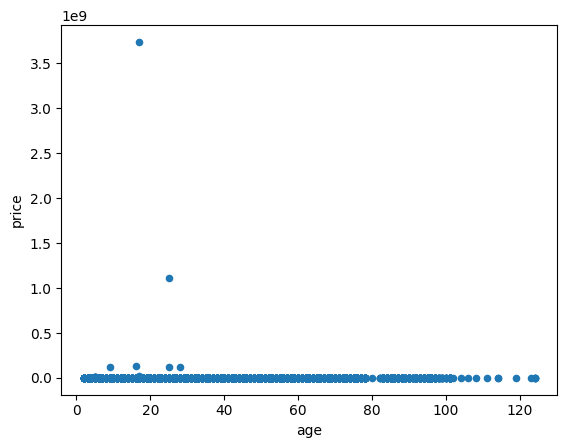

In [21]:
df_clean.plot(kind='scatter',x='age', y='price', style='o')
plt.show()

As we expected before we have outliers around the 3.5 and 1 billion dollar ranges. As such we should cull these values and try again.

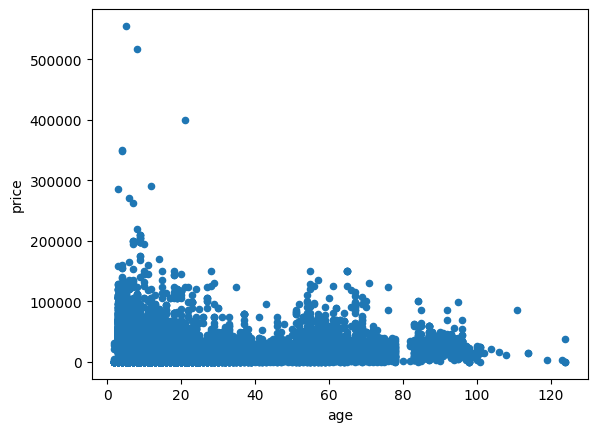

In [22]:
df_clean[df_clean.price.ne(0) & df_clean.price.lt(1000000)].plot(kind='scatter',x='age', y='price', style='o')
plt.show()

This now looks a lot better. We managed to cut down on a lot of outliers and have reached a much more reasonable distribution. As we can see price is generally higher the newer the car is. Now lets cull our data to these values.

In [23]:
df_clean = df_clean[df_clean.price.ne(0) & df_clean.price.lt(1000000)]
df_clean['price'].describe()

count    208944.000000
mean      18831.601989
std       13933.463357
min           1.000000
25%        7500.000000
50%       15998.000000
75%       27990.000000
max      554900.000000
Name: price, dtype: float64

Now lets prepare our data for imputation

In [24]:
df_clean.dropna(subset=['condition','type'], inplace=True)

<ipython-input-24-e59c4c233d56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(subset=['condition','type'], inplace=True)


In [25]:
df_clean.ffill(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208944 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         208944 non-null  int64  
 1   manufacturer  208944 non-null  object 
 2   condition     208944 non-null  object 
 3   fuel          208944 non-null  object 
 4   odometer      208944 non-null  float64
 5   title_status  208944 non-null  object 
 6   transmission  208944 non-null  object 
 7   type          208944 non-null  object 
 8   age           208944 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 15.9+ MB


<ipython-input-25-9a67fd434e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.ffill(inplace=True)


Now we need to encode all of our data to prepare it for the model. First lets seperate categories that need ordinal encoding and one hot encoding.

In [26]:
ordenc = ['condition']
ohenc = ['manufacturer','fuel','title_status','transmission','type']
numenc = ['age','odometer']

We create the column transformer for feature engineering

[Text(0.5, 1.0, 'Heatmap for all columns')]

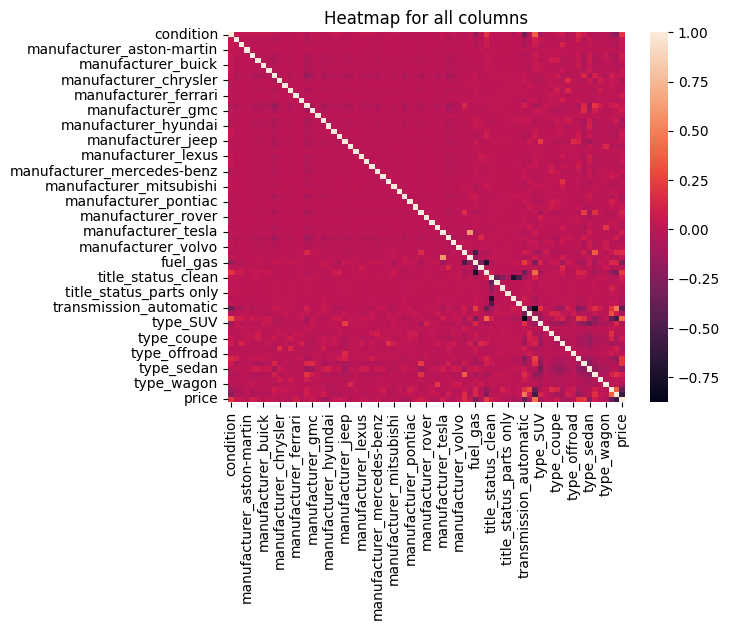

In [27]:
FeatureEngineering = make_column_transformer((OrdinalEncoder(), ordenc), (OneHotEncoder(sparse_output=False, drop="if_binary"), ohenc), (StandardScaler(), numenc), remainder="passthrough", verbose_feature_names_out=False,)
df_final = pd.DataFrame(FeatureEngineering.fit_transform(df_clean), columns=FeatureEngineering.get_feature_names_out())
sns.heatmap(df_final.corr()).set(title='Heatmap for all columns')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, KFold, LeaveOneOut, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy as sp

In [29]:
X = df_final.drop(columns=['price'])
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

# Linear Regression

In [30]:
lnreg_pipe = Pipeline([('polyfeat', PolynomialFeatures(include_bias=False)), ('lnreg',LinearRegression(),)])
params = {'polyfeat__degree':[1,2]}
lnreg_selector = GridSearchCV(estimator=lnreg_pipe, param_grid=params, scoring='neg_mean_squared_error', cv=ShuffleSplit(n_splits=2, test_size=0.8, random_state=42))

In [31]:
lnreg_selector.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.8, train_size=None),
             estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lnreg', LinearRegression())]),
             param_grid={'polyfeat__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [32]:
lnreg_model = lnreg_selector.best_estimator_

In [33]:
lnreg_params = lnreg_selector.best_params_
lnreg_params

{'polyfeat__degree': 1}

In [34]:
lnreg_coefs = pd.DataFrame(lnreg_model.named_steps['lnreg'].coef_,  index=[lnreg_model.named_steps['polyfeat'].get_feature_names_out()], columns=['COEF'])
lnreg_coefs.sort_values(by=['COEF'], ascending=False)

,COEF
title_status_lien,6.765073e+13
title_status_clean,6.765073e+13
title_status_rebuilt,6.765073e+13
title_status_salvage,6.765073e+13
title_status_missing,6.765073e+13
...,...
fuel_hybrid,-6.249074e+14
fuel_electric,-6.249074e+14
transmission_other,-7.797924e+15
transmission_manual,-7.797924e+15


Lets look at the scores of the model

In [35]:
lnreg_r2 = lnreg_model.score(X_test,y_test)
lnreg_r2

0.569048663711216

Our linear regression model has almost a 60% accuracy

In [36]:
lnreg_rmse = np.sqrt(mean_squared_error(y_test,lnreg_model.predict(X_test)))
lnreg_rmse

9104.01188614347

In [37]:
lnreg_mae = mean_absolute_error(y_test,lnreg_model.predict(X_test))
lnreg_mae

5891.908300788728

Our root mean squared error is around 9100 and our mean absolute error is around 5800. In the context of car price, these are kind of high values.

# Ridge Pipeline

In [38]:
r_pip = Pipeline([('polyfeat',PolynomialFeatures(include_bias=False)), ('ridge',Ridge()),])

In [39]:
params = {'polyfeat__degree':[1,2],'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
r_select = GridSearchCV(estimator=r_pip, param_grid=params, scoring='neg_mean_squared_error', cv=ShuffleSplit(n_splits=2, test_size=0.8, random_state=42))

In [40]:
r_select.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.8, train_size=None),
             estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge())]),
             param_grid={'polyfeat__degree': [1, 2],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [41]:
r_model = r_select.best_estimator_

In [42]:
r_params = r_select.best_params_
r_params

{'polyfeat__degree': 2, 'ridge__alpha': 10}

In [43]:
r_coefs = pd.DataFrame(r_model.named_steps['ridge'].coef_, index=[r_model.named_steps['polyfeat'].get_feature_names_out()], columns=['COEF'])
r_coefs.sort_values(by=['COEF'], ascending=False).head(20)

,COEF
manufacturer_fiat type_pickup,30498.730117
manufacturer_fiat fuel_diesel,24175.340539
manufacturer_ferrari title_status_clean,16613.598970
manufacturer_ferrari fuel_gas,16502.643415
manufacturer_ferrari^2,16502.643415
manufacturer_ferrari,16502.643415
manufacturer_tesla type_coupe,15022.280014
manufacturer_ferrari transmission_other,13163.091384
manufacturer_ferrari type_coupe,9912.181584
manufacturer_jaguar transmission_manual,9785.144031


In [44]:
r_r2 = r_model.score(X_test, y_test)
r_r2

0.6891001136377959

Our ridge model has almost a 70% accuracy

In [45]:
r_rmse = np.sqrt(mean_squared_error(y_test,r_model.predict(X_test)))
r_rmse

7732.661191323843

In [46]:
r_mae = mean_absolute_error(y_test,r_model.predict(X_test))
r_mae

4568.887658676777

Our root mean squared error is around 7700 and our mean absolute error is around 4500. In the context of car price, these are kind of high values.

# Lasso Pipeline

In [47]:
l_pipe = Pipeline([('polyfeat',PolynomialFeatures(include_bias=False)), ('lasso',Lasso())])

In [48]:
params = {'polyfeat__degree':[1,2],'lasso__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
l_selector = GridSearchCV(estimator=l_pipe, param_grid=params, scoring='neg_mean_squared_error', cv=ShuffleSplit(n_splits=2, test_size=0.8, random_state=42))

In [49]:
l_selector.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+11, tolerance: 5.772e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+11, tolerance: 6.615e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.095e+11, tolerance: 5.772e

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.8, train_size=None),
             estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'polyfeat__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [50]:
l_model = l_selector.best_estimator_

In [51]:
l_params = l_selector.best_params_
l_params

{'lasso__alpha': 1, 'polyfeat__degree': 2}

In [52]:
l_coefs = pd.DataFrame(l_model.named_steps['lasso'].coef_, index=[l_model.named_steps['polyfeat'].get_feature_names_out()], columns=['COEF'])
l_coefs.sort_values(by=['COEF'], ascending=False)

,COEF
manufacturer_fiat type_pickup,221822.543218
manufacturer_tesla type_coupe,16851.453815
manufacturer_jaguar transmission_manual,10245.766947
manufacturer_tesla,9664.751729
manufacturer_rover fuel_diesel,9561.023449
...,...
manufacturer_porsche odometer,-8055.444075
age,-8910.256500
transmission_other type_bus,-12147.403877
manufacturer_ferrari age,-20459.529393


In [53]:
l_coefs.query('COEF == 0')

,COEF
manufacturer_aston-martin,0.0
manufacturer_buick,-0.0
manufacturer_datsun,0.0
manufacturer_ferrari,0.0
manufacturer_fiat,-0.0
...,...
type_sedan type_wagon,0.0
type_truck type_van,0.0
type_truck type_wagon,0.0
type_van^2,0.0


In [54]:
l_r2 = l_model.score(X_test,y_test)
l_r2

0.687606121357539

Our lasso model has an almost 70% accuracy

In [55]:
l_rmse = np.sqrt(mean_squared_error(y_test,l_model.predict(X_test)))
l_rmse

7751.218114781731

In [56]:
l_mae = mean_absolute_error(y_test,l_model.predict(X_test))
l_mae

4591.381497392069

Our root mean squared error is around 7700 and our mean absolute error is around 4600. In the context of car price, these are kind of high values.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

From our earlier heatmap we can see that age, milage, type, and condition of the vehicle all had the highest impact on price. One surprising thing that we noticed was that title status didnt have as large of an impact on price as one would assume. One possible reason for this could be the large amound of missing data that we had. Perhaps a more complete dataset would yield completely different results.

In [57]:
mod_comp = pd.DataFrame({'RMSE':[lnreg_rmse,r_rmse,l_rmse],'MAE':[lnreg_mae,r_mae,l_mae],'Score':[lnreg_r2,r_r2,l_r2], 'Params':[lnreg_params,r_params,l_params]}, columns=['RMSE','MAE','Score','Params'], index=['Linear Regression','Ridge Regression','Lasso Regression'])
mod_comp.sort_values(by=['RMSE','MAE','Score'])

,RMSE,MAE,Score,Params
Ridge Regression,7732.661191,4568.887659,0.689100,"{'polyfeat__degree': 2, 'ridge__alpha': 10}"
Lasso Regression,7751.218115,4591.381497,0.687606,"{'lasso__alpha': 1, 'polyfeat__degree': 2}"
Linear Regression,9104.011886,5891.908301,0.569049,{'polyfeat__degree': 1}


From this we can see that our lasso regression model preformed the best and our linear regression model preformed the worst. Likely the problems with our linear regression model were due to overfitting. As such when we used L1 regularisation, we were able to reduce the number of errors leading to a drastic increase in accuracy and decrease in RMSE and MAE.*italicised text*

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Using this data dealerships could optomise their fleets in order to maximise profits. This analysis could be redone with a focus on the region that the dealership is from, looking to discover prospective buyers tastes. Being able to optimise the dealerships acquisitions will help significantly in raising profits. Dealerships would know that purchasing a newer car would be significantly more benificial than a classic. As well, focusing on keeping your fleet low milage would also work to increase the price people are willing to pay.